# Donner des outils à nos modèles


## Initialisation 

In [1]:
import getpass
import os
def _set_env(key: str):
    if key not in os.environ:
        os.environ[key] = getpass.getpass(f"{key}:")


_set_env("MISTRAL_API_KEY")
_set_env("TAVILY_API_KEY")

## Définition des outils

In [ ]:
from tavily import TavilyClient
from langchain.tools import tool

tavily_client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

@tool
def internet_search(query: str):
    

@tool
def write_file(content: str) -> str:
    


# Liste des outils disponibles
tools = [internet_search, write_file]

/Users/geoffreypruvost/Projets/cours_agents_IA/students/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Définitions des noeuds du graphe

In [ ]:
# Noeuds
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langchain.chat_models import init_chat_model


def reponse_question(state: MessagesState):
    """Noeud qui réponds à la question, en s'aidant si besoin des outils à disposition"""
    # Initialisation du LLM
    

    # Bind des outils 
    # (le modèle peut demander de l'aide à des outils 
    # mais ils ne sont pas exécutés dans ce noeud)
    
    
    # Appel du LLM 
    

    return 

# Noeud spécial qui exécute les outils demandé par un LLM 
tool_node = 

## Définition de l'enchaînement des noeuds


Le workflow d'un agent : 
- on traite la question de l'utilisateur
- si le noeud du LLM à besoin d'utiliser un outil, alors on exécute son outil
- sinon on termine

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END

# Init du graphe
workflow = StateGraph(MessagesState)

# Ajout des noeuds


# fonction de routage : Après reponse_question, si le LLM veut appeler un outil, on va au tool_node, sinon on termine
def should_continue(state: MessagesState):
    
# Ajout des arrêtes


# On compile le workflow
graph = workflow.compile()

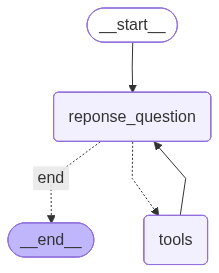

In [5]:
graph

### Test de l'agent

In [6]:
# Exécution du graphe
result = graph.invoke({"messages": ["Combien vaut 1 euros en dollars ? Met la valeur dans un fichier."]})

# Affichage des messages
for message in result["messages"]:
    print(message.pretty_print())

================================ Human Message =================================

Combien vaut 1 euros en dollars ? Met la valeur dans un fichier.
None
================================== Ai Message ==================================
Tool Calls:
  internet_search (hTv4QB2Id)
 Call ID: hTv4QB2Id
  Args:
    query: 1 euro en dollars aujourd'hui
None
================================= Tool Message =================================
Name: internet_search

{"query": "1 euro en dollars aujourd'hui", "response_time": 0.56, "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.revolut.com/fr-FR/currency-converter/convert-eur-to-usd-exchange-rate/?amount=1", "title": "1 EUR en USD : convertissez des euros en dollars américains", "content": "Taux de change des euros en dollars américains aujourd'hui ; 1 EUR, 1,15 USD ; 10 EUR, 11,56 USD ; 20 EUR, 23,12 USD ; 50 EUR, 57,82 USD.", "score": 0.99963164, "raw_content": null}, {"url": "https://www.xe.com/fr/currencyc

# On peut faire plus simple ! 

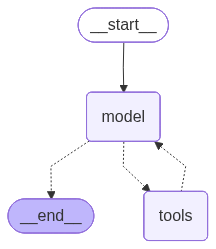

In [8]:
agent_simple

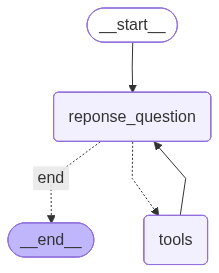

In [ ]:
# Agent custom développé au dessus
graph

### Conclusion 

Si on a besoin d'un agent simple (un LLM + des outils) alors pas besoin d'un graphe custom ! 

Si on a besoin d'un agent plus complexe (gestion de mémoire spécifique, pré-traitement, vérification de résultats, traitement des résultats, ...), alors on devra utiliser langgraph et développer un workflow agentique.

# Utiliser les MCP (tools externe) : Model Context Protocol 


Pourquoi utiliser les MCP ? 
- Permettre à ses utilisateurs de se connecter à votre Agent leurs propres outils MCP (comme des plugins ou extensions d'un logiciel)

Pourquoi utiliser les tools de langgraph ?
- quand vous codez vos propres outils
- quand vous utilisez des APIs externes mais que vous souhaitez gérer le format des messages (certains LLMs souhaitent des formats particuliers)

In [10]:
from langchain_mcp_adapters.client import MultiServerMCPClient  


client = MultiServerMCPClient(  
    {
        "web_search": {
            "transport": "streamable_http",  # HTTP-based remote server
            # Ensure you start your weather server on port 8000
            "url": f"https://mcp.tavily.com/mcp/?tavilyApiKey={os.environ["TAVILY_API_KEY"]}",
        }
    }
)

tools_mcp = await client.get_tools()  


# On notera qu'on a autant de ligne de code que d'utiliser 
# directement la librairie de TAVILY...
# Et on ne controle pas les outils du MCP, c'est Tavily qui l'a développé


agent_mcp = create_agent(
    "mistral-large-latest",
    tools_mcp  
)

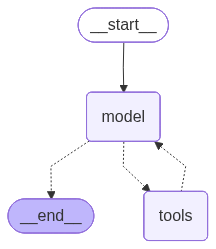

In [11]:
agent_mcp

In [ ]:
response_mcp = await agent_mcp.ainvoke(
    {"messages": [{"role": "user", "content": "Combien vaut 1 euros en dollars ?"}]}
)

# Affichage des messages
for message in response_mcp["messages"]:
    print(message.pretty_print())
